In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

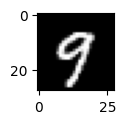

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[45], cmap ='gray')

In [9]:
y_train[45]

9

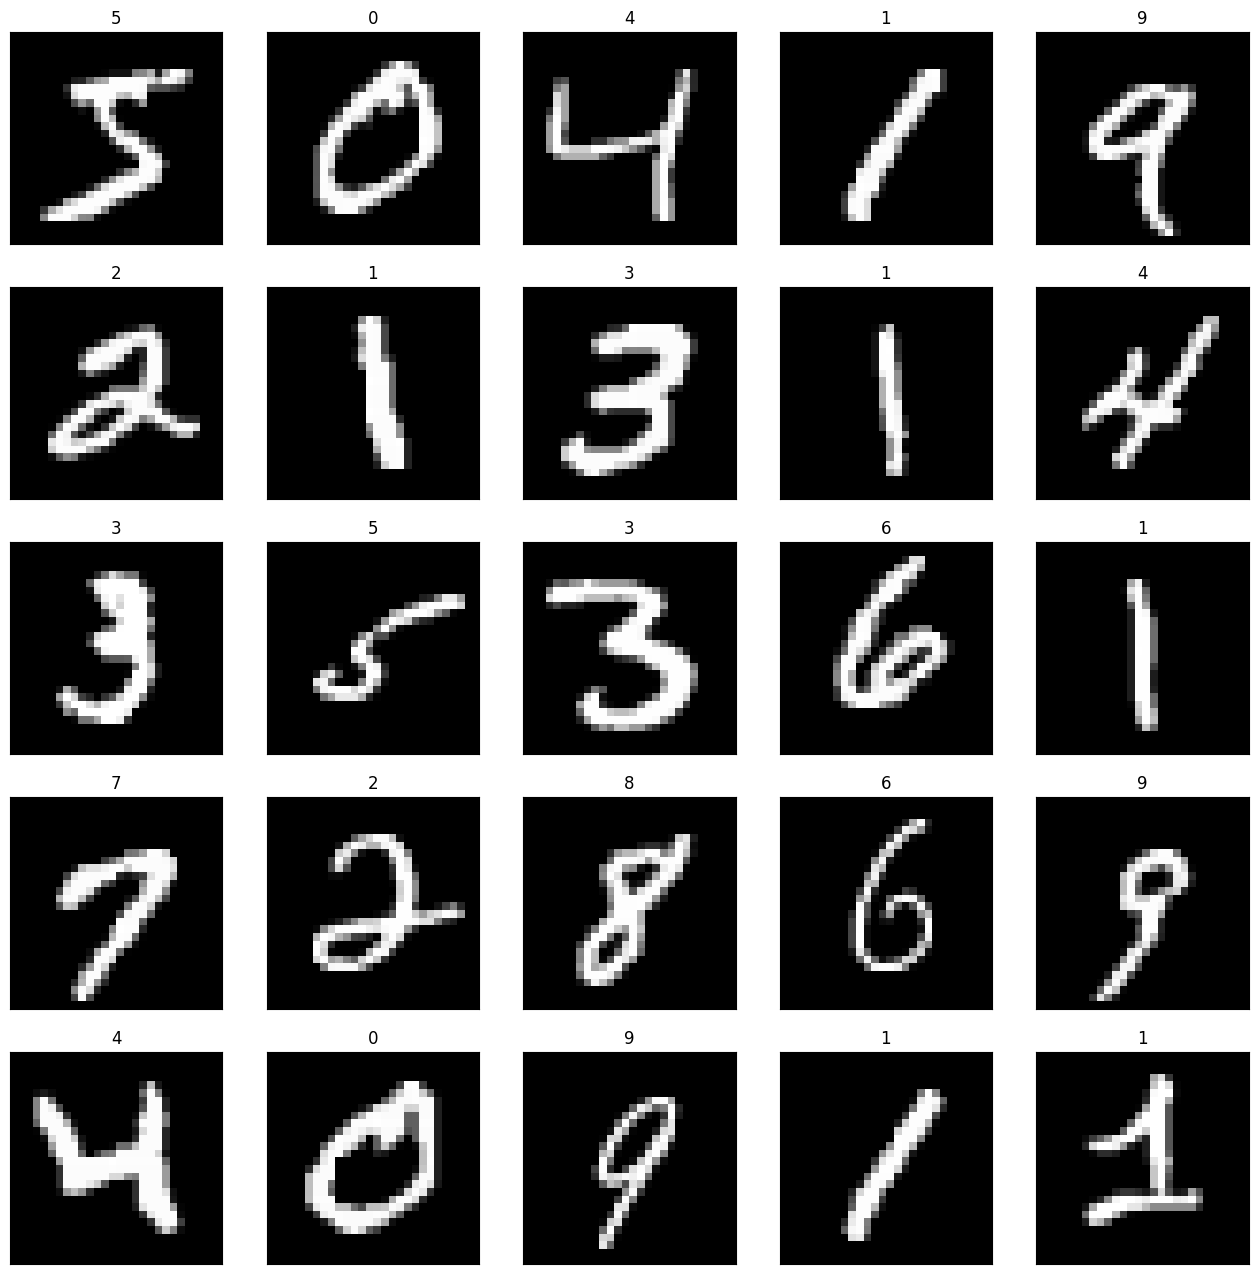

In [14]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xticks([]); plt.yticks([])
    plt.title(y_train[i])

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

In [52]:
model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=32, activation='relu', kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, activation='relu', kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [26]:
# train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8864 - loss: 0.7730
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9779 - loss: 0.0702
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9828 - loss: 0.0546
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9863 - loss: 0.0450
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9898 - loss: 0.0339
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9907 - loss: 0.0303
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9924 - loss: 0.0273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9926 - loss: 0.0241
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9922 - loss: 0.0265
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9947 - loss: 0.0181


In [27]:
# Evaluate on test data
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9825 - loss: 0.0911


[0.07649611681699753, 0.9853000044822693]

In [28]:
import cv2

In [71]:
new_img = cv2.imread('images/new-char.png', 0)
new_img = cv2.resize(new_img, (28,28))
_, new_img = cv2.threshold(new_img, 128,255, cv2.THRESH_BINARY_INV)

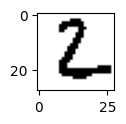

In [72]:
plt.figure(figsize=(1,1))
plt.imshow(new_img, cmap = 'gray')

In [73]:
new_img = new_img.reshape((1,28,28))
pred = model.predict(new_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [74]:
pred

array([[4.8146934e-17, 2.1334318e-22, 9.9993038e-01, 7.5050570e-25,
        6.9605754e-05, 2.1525342e-24, 1.1759094e-11, 4.6222113e-19,
        7.6103794e-31, 1.8911421e-27]], dtype=float32)

In [75]:
pred.argmax()

2